# Functional Transformers on credit card dataset

In [52]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import plotly as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score




In [53]:
df = pd.read_csv("../credit_card_fraud_10k.csv")

In [54]:
df.head(5
)

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [55]:
df["merchant_category"].nunique()

5

In [56]:
df.drop(columns=["transaction_id"], inplace=True)

In [57]:
df.isna().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   amount               10000 non-null  float64
 1   transaction_hour     10000 non-null  int64  
 2   merchant_category    10000 non-null  object 
 3   foreign_transaction  10000 non-null  int64  
 4   location_mismatch    10000 non-null  int64  
 5   device_trust_score   10000 non-null  int64  
 6   velocity_last_24h    10000 non-null  int64  
 7   cardholder_age       10000 non-null  int64  
 8   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 703.3+ KB


In [58]:
input_cols = df.columns.to_list()[0:8]
target_col = df.columns.to_list()[8]
df.columns

Index(['amount', 'transaction_hour', 'merchant_category',
       'foreign_transaction', 'location_mismatch', 'device_trust_score',
       'velocity_last_24h', 'cardholder_age', 'is_fraud'],
      dtype='object')

In [59]:
target_col

'is_fraud'

In [60]:
target_col

'is_fraud'

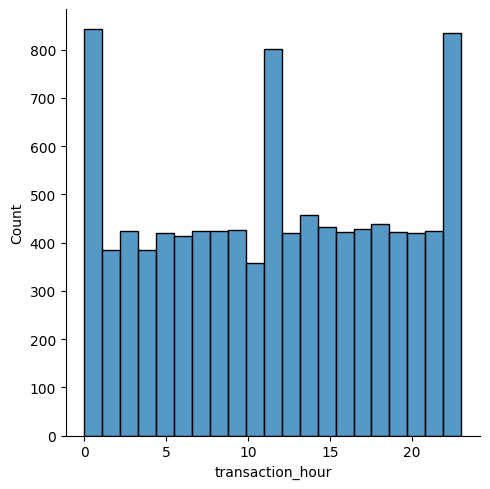

In [61]:
sns.displot(x = df["transaction_hour"])

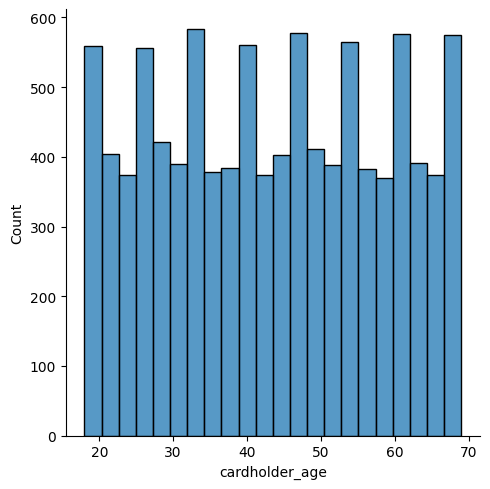

In [62]:
sns.displot(df["cardholder_age"])

<Axes: xlabel='cardholder_age', ylabel='device_trust_score'>

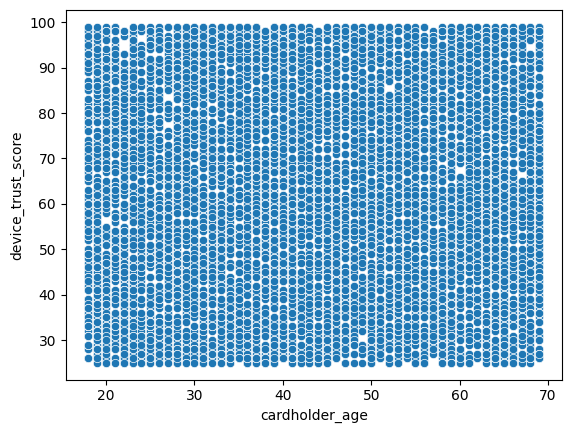

In [63]:
sns.scatterplot(x = df['cardholder_age'], y=df["device_trust_score"])

In [64]:
df.columns.tolist()
target_col
input_cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   amount               10000 non-null  float64
 1   transaction_hour     10000 non-null  int64  
 2   merchant_category    10000 non-null  object 
 3   foreign_transaction  10000 non-null  int64  
 4   location_mismatch    10000 non-null  int64  
 5   device_trust_score   10000 non-null  int64  
 6   velocity_last_24h    10000 non-null  int64  
 7   cardholder_age       10000 non-null  int64  
 8   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 703.3+ KB


In [65]:

df.transaction_hour
len(input_cols)

8

### without transformations

In [66]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df[input_cols], df[target_col], test_size=0.3, random_state=42)

In [67]:
Xtrain.shape, Xtest.shape
Ytrain.shape, Ytest.shape

((7000,), (3000,))

In [68]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [69]:
Xtrain.head(4)

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age
9069,25.44,21,Food,0,0,58,5,54
2603,68.78,20,Electronics,0,0,70,3,48
7738,197.00,3,Clothing,0,0,62,2,38
1579,142.42,6,Food,0,0,35,3,22


In [70]:
trf1 = ColumnTransformer([("encoding", OneHotEncoder(sparse_output=False, drop="first"), [2]),
                          ("scaling", MinMaxScaler(),[0, 1,5, 6,7] )])

In [71]:
trf1.fit(Xtrain)

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('encoding', ...), ('scaling', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name`

In [72]:
Xtrain_transformed = trf1.transform(Xtrain)
Xtest_transformed = trf1.transform(Xtest)



In [73]:
Xtrain = pd.DataFrame(Xtrain, columns=input_cols)
Xtest = pd.DataFrame(Xtest, columns=input_cols)

In [74]:
clf1.fit(Xtrain_transformed, Ytrain)
clf2.fit(Xtrain_transformed, Ytrain)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [75]:
pred1 = clf1.predict(Xtest_transformed)
pred2 = clf2.predict(Xtest_transformed)

In [76]:
accuracy_score(pred1, Ytest), accuracy_score(pred2, Ytest)


(0.982, 0.9756666666666667)

In [77]:
input_cols, target_col

(['amount',
  'transaction_hour',
  'merchant_category',
  'foreign_transaction',
  'location_mismatch',
  'device_trust_score',
  'velocity_last_24h',
  'cardholder_age'],
 'is_fraud')

In [78]:
# Check the balance of your target variable
print(Ytrain.value_counts(normalize=True))

is_fraud
0    0.986143
1    0.013857
Name: proportion, dtype: float64
